In [179]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Read and inspect dataset

In [180]:
# read dataset
df_base = pd.read_csv("day.csv")
df_base.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [181]:
# Inspect the dataset and its properties
df_base.shape

(730, 16)

In [182]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [183]:
# Inspect for missing values in the feature
df_base.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

### Data Cleaning

#### Replace values in categorical columns with relavant description

In [184]:
# Replace values in column 'season' with relavant value from data dictionary
df_base['season'].mask(df_base['season'] == 1, 'spring', inplace=True)
df_base['season'].mask(df_base['season'] == 2, 'summer', inplace=True)
df_base['season'].mask(df_base['season'] == 3, 'fall', inplace=True)
df_base['season'].mask(df_base['season'] == 4, 'winter', inplace=True)
df_base['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [185]:
# Replace values in column 'weathersit' with relavant value from data dictionary
df_base['weathersit'].mask(df_base['weathersit'] == 1, 'clear', inplace=True)
df_base['weathersit'].mask(df_base['weathersit'] == 2, 'mist', inplace=True)
df_base['weathersit'].mask(df_base['weathersit'] == 3, 'light', inplace=True)
df_base['weathersit'].mask(df_base['weathersit'] == 4, 'heavy', inplace=True)
df_base['weathersit'].value_counts()

clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [186]:
# Replace values in column 'mnth' with relavant value from data dictionary
df_base['mnth'].mask(df_base['mnth'] == 1, 'jan', inplace=True)
df_base['mnth'].mask(df_base['mnth'] == 2, 'feb', inplace=True)
df_base['mnth'].mask(df_base['mnth'] == 3, 'mar', inplace=True)
df_base['mnth'].mask(df_base['mnth'] == 4, 'apr', inplace=True)
df_base['mnth'].mask(df_base['mnth'] == 5, 'may', inplace=True)
df_base['mnth'].mask(df_base['mnth'] == 6, 'jun', inplace=True)
df_base['mnth'].mask(df_base['mnth'] == 7, 'jul', inplace=True)
df_base['mnth'].mask(df_base['mnth'] == 8, 'aug', inplace=True)
df_base['mnth'].mask(df_base['mnth'] == 9, 'sep', inplace=True)
df_base['mnth'].mask(df_base['mnth'] == 10, 'oct', inplace=True)
df_base['mnth'].mask(df_base['mnth'] == 11, 'nov', inplace=True)
df_base['mnth'].mask(df_base['mnth'] == 12, 'dec', inplace=True)
df_base['mnth'].value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [187]:
# Inspect resultant dataframe
df_base.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,jan,0,4,1,clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,jan,0,5,1,mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,jan,0,6,0,mist,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,jan,0,0,0,clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,jan,0,1,1,clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [188]:
# Remove columns 'casual' and 'registered' as they are not independant variables and will not be required for analysis
df_base = df_base.drop(['casual','registered'],axis=1)
df_base.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,jan,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,jan,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [189]:
# Derived column: excess_temp = atemp-temp
df_base['excess_temp']=df_base['atemp']-df_base['temp']
df_base.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,excess_temp
0,1,01-01-2018,spring,0,jan,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985,4.070403
1,2,02-01-2018,spring,0,jan,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,2.784352
2,3,03-01-2018,spring,0,jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1.419326
3,4,04-01-2018,spring,0,jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562,2.406100
4,5,05-01-2018,spring,0,jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600,2.158263


In [190]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      730 non-null    int64  
 1   dteday       730 non-null    object 
 2   season       730 non-null    object 
 3   yr           730 non-null    int64  
 4   mnth         730 non-null    object 
 5   holiday      730 non-null    int64  
 6   weekday      730 non-null    int64  
 7   workingday   730 non-null    int64  
 8   weathersit   730 non-null    object 
 9   temp         730 non-null    float64
 10  atemp        730 non-null    float64
 11  hum          730 non-null    float64
 12  windspeed    730 non-null    float64
 13  cnt          730 non-null    int64  
 14  excess_temp  730 non-null    float64
dtypes: float64(5), int64(6), object(4)
memory usage: 85.7+ KB


## Exploratory Data Analysis

### Step 1: Univariate Analysis

In [191]:
# Categorize features in to numerical and categorical features
cat_cols = ["season","yr","mnth","holiday","weekday","workingday","weathersit"] #categorical columns
num_cols = ["temp","atemp","hum","windspeed","excess_temp","cnt"] #numerical columns
other_cols = ["instant","dteday"]

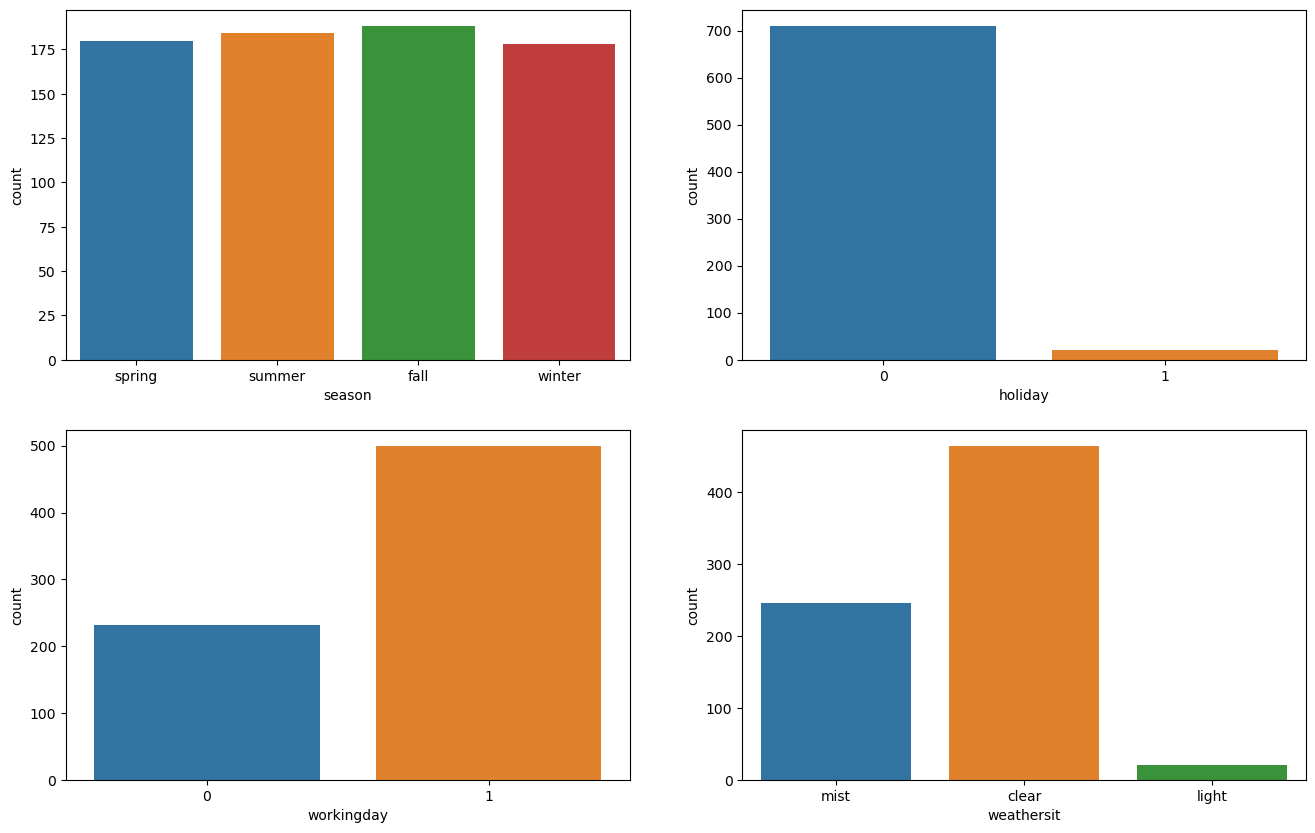

In [192]:
# Inspect distribution of various categorical variables
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.countplot('season',data=df_base,ax=ax[0][0])
sns.countplot('holiday',data=df_base,ax=ax[0][1])
sns.countplot('workingday',data=df_base,ax=ax[1][0])
sns.countplot('weathersit',data=df_base,ax=ax[1][1])
plt.show()

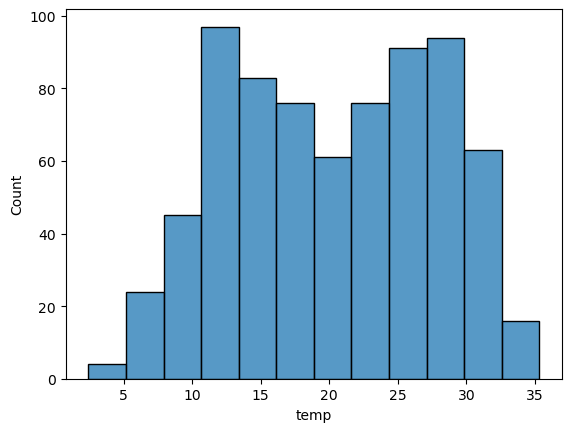

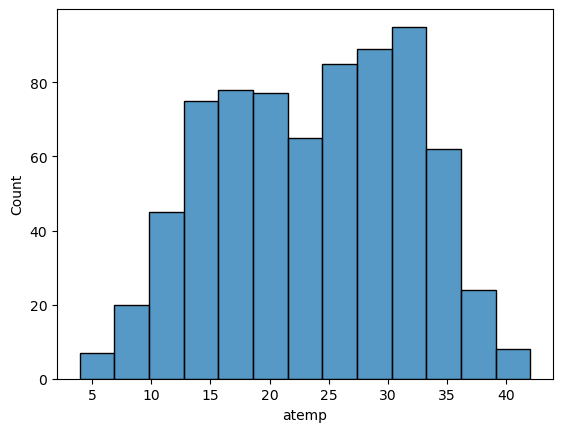

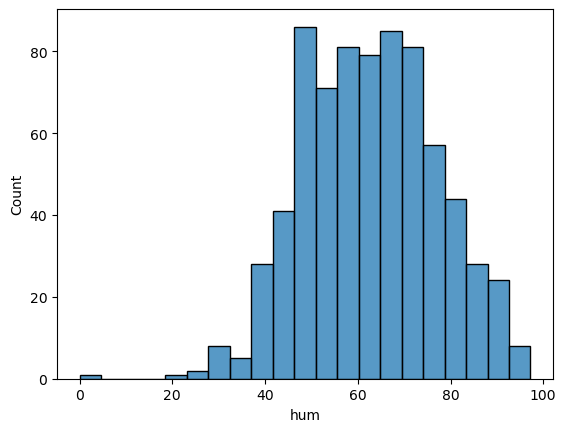

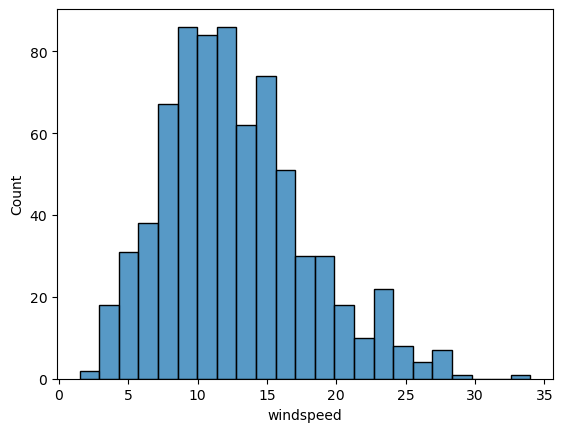

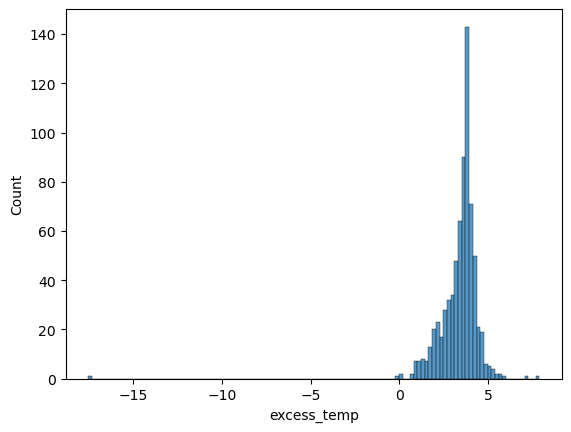

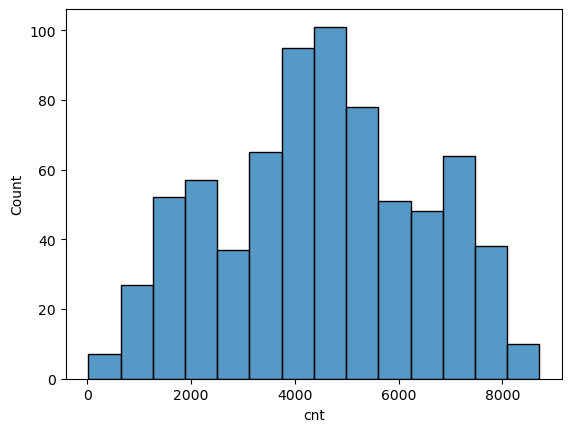

In [193]:
# Inspect distribution of various numerical variables
for i in num_cols:
    sns.histplot(x=df_base[i])
    plt.show()

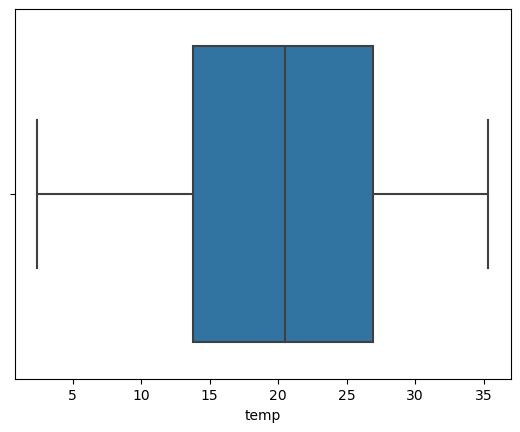

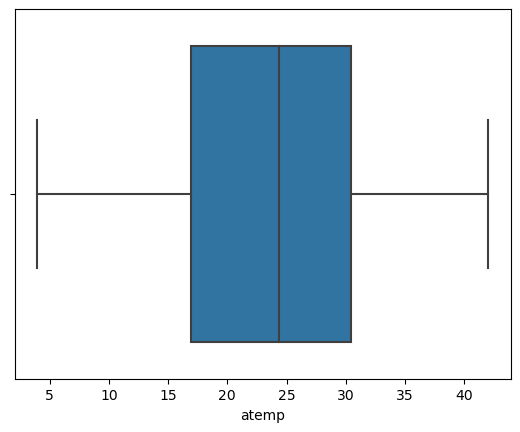

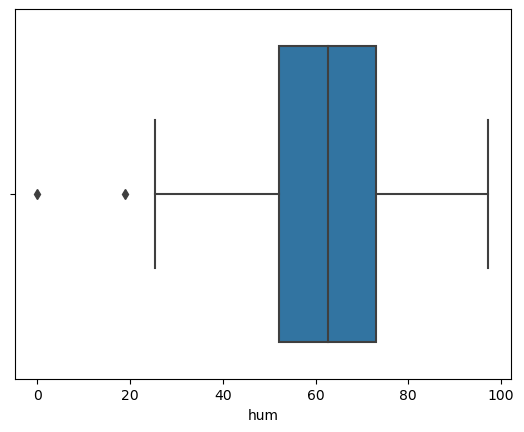

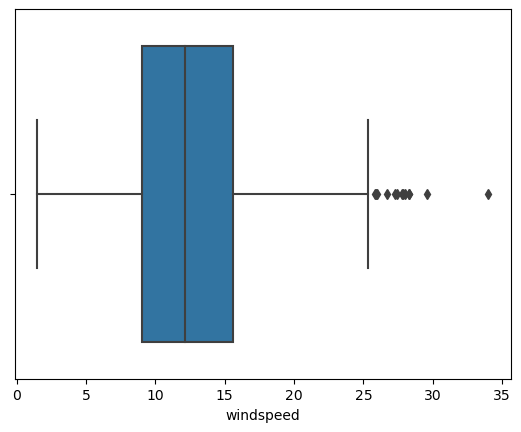

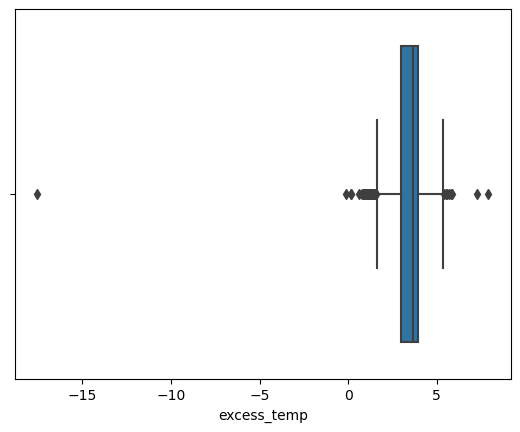

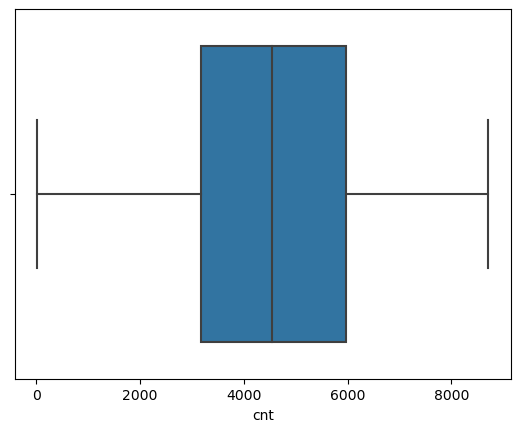

In [194]:
# Inspect distribution of various numerical variables using box plot
for i in num_cols:
    sns.boxplot(x=df_base[i])
    plt.show()

##### Observations: Above boxplots shows presence of outliers for features 'hum' (humidity),'windspeed' and 'casual' (causal users)

### Bivariate Analysis

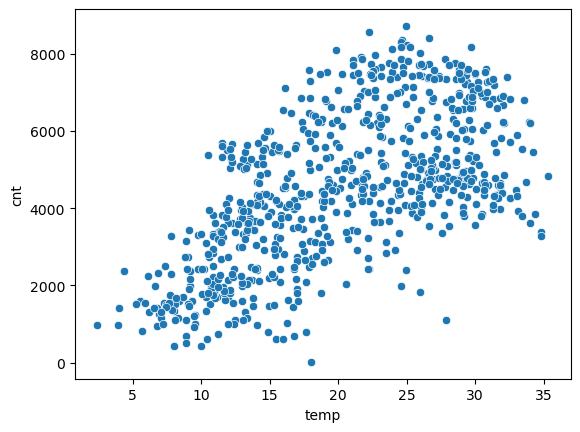

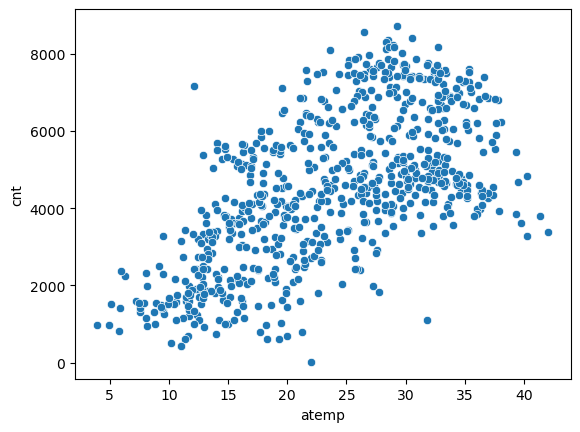

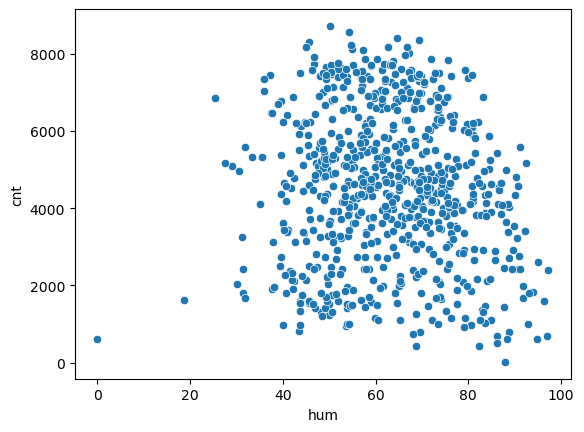

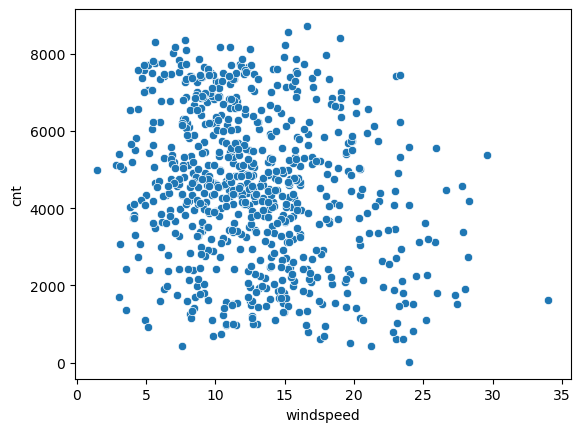

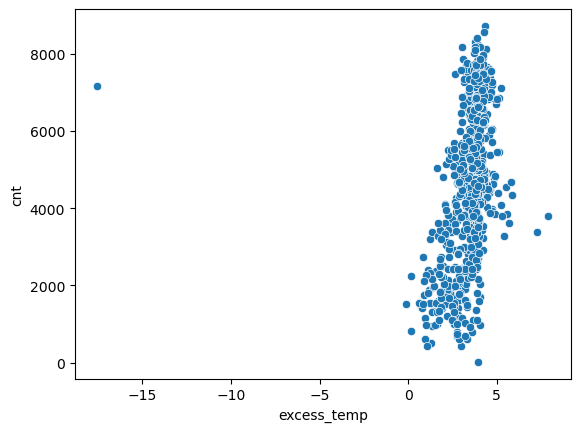

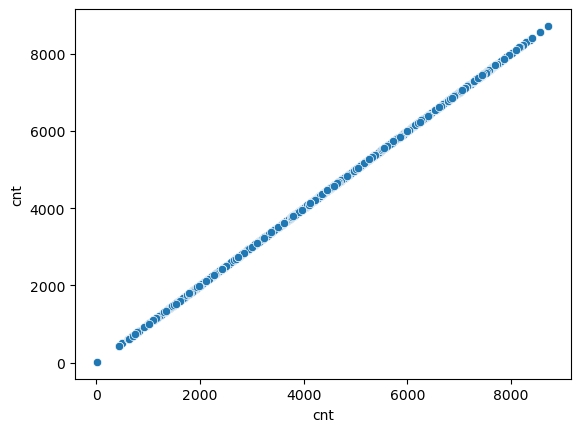

In [195]:
# Analyze potential linear relationship between numerical features and dependant variable using scatter plot
for i in num_cols:
    sns.scatterplot(x=df_base[i],y=df_base['cnt'])
    plt.show()

##### Observations: It seems that features 'temp' and 'atemp' exhibit linear relationship with dependant variable 'cnt'.

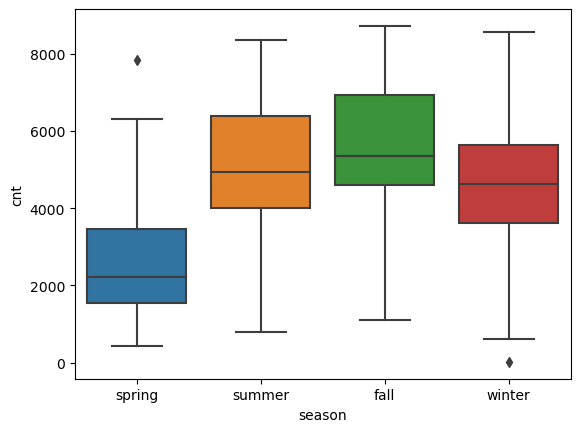

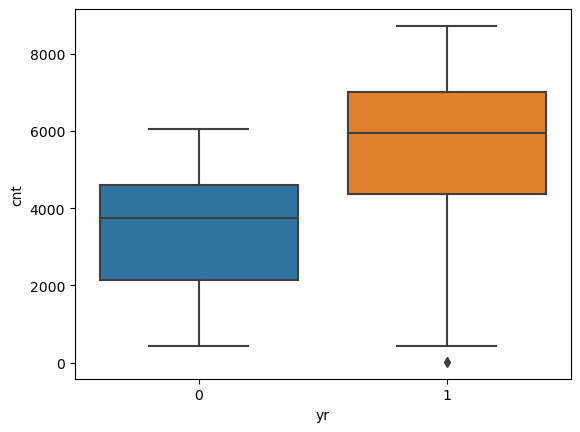

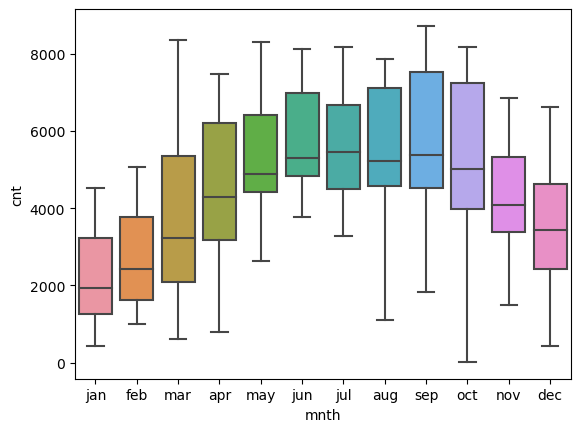

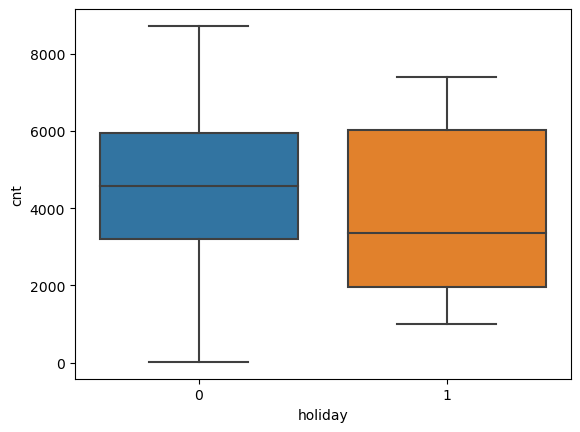

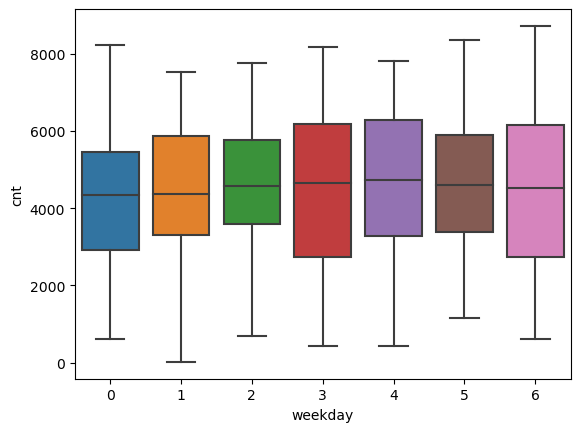

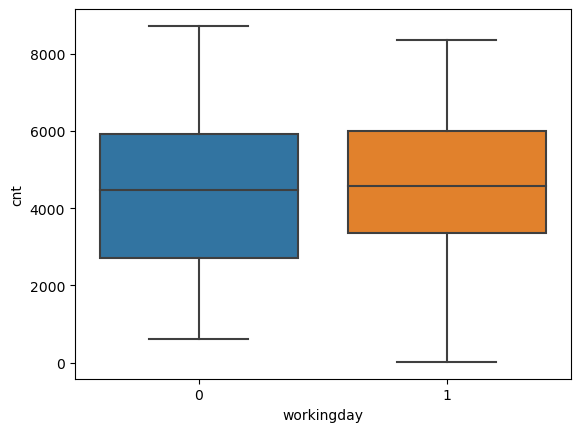

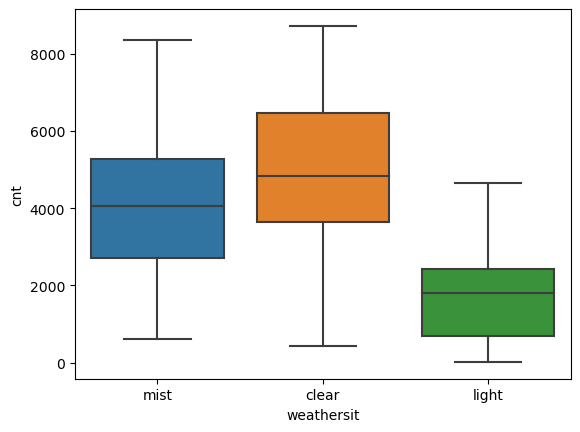

In [196]:
# Inspect categorical features against the dependant variable using box plots
for i in cat_cols:
    sns.boxplot(x=df_base[i],y=df_base['cnt'])
    plt.show()

##### Observations: 
##### 1. Bike sharing has increase during fall and summer.
##### 2. Bike sharing has incresed significantly in second year i.e. 2019.
##### 3. Bike sharing seems to be higher during June to September.
##### 4. Bike sharing is higher on non-holiday (indicated by 0).
##### 5. Bike sharing is higher on the days with clear weather.

### Multivariate Analysis

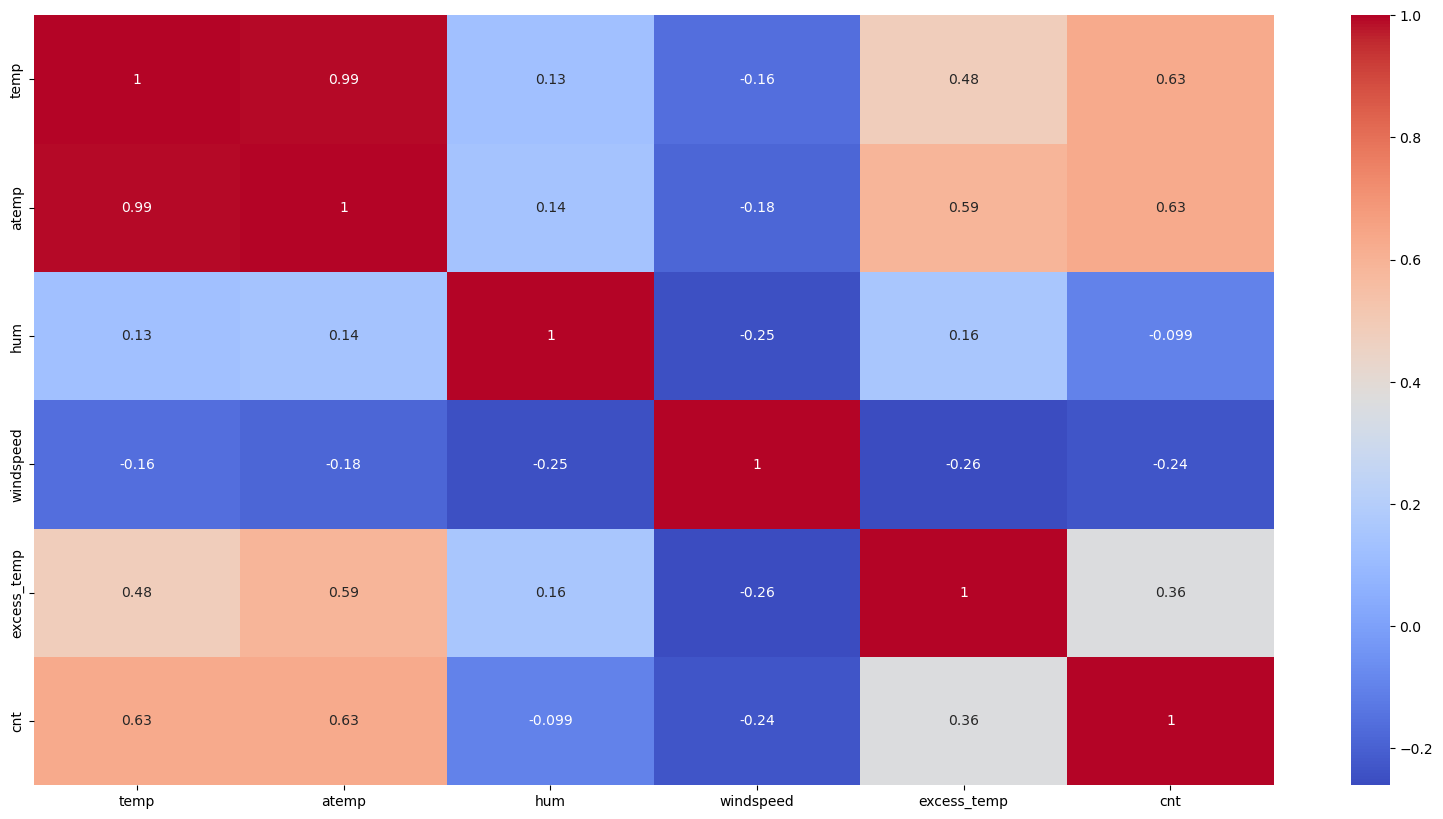

In [197]:
# Identify correlation among numerical features
df_num_cols = df_base[num_cols]
plt.figure(figsize=(20,10))
sns.heatmap(df_num_cols.corr(),cmap='coolwarm',annot=True)
plt.show()

##### Observations: As features 'temp' and 'atemp' are higherly correlated with each other, we can drop one of them for further analysis.

In [198]:
# Remove feature 'temp' from dataframe as stated above
# Remove features 'instant' and 'dteday' as they are no more required for model building.
df = df_base.drop(['temp','instant','dteday'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,excess_temp
0,spring,0,jan,0,6,0,mist,18.18125,80.5833,10.749882,985,4.070403
1,spring,0,jan,0,0,0,mist,17.68695,69.6087,16.652113,801,2.784352
2,spring,0,jan,0,1,1,clear,9.47025,43.7273,16.636703,1349,1.419326
3,spring,0,jan,0,2,1,clear,10.60610,59.0435,10.739832,1562,2.406100
4,spring,0,jan,0,3,1,clear,11.46350,43.6957,12.522300,1600,2.158263


In [199]:
# Inspect shape of new dataframe
df.shape

(730, 12)

## Pre-processing

### Step 1: One-hot encoding for categorical features

In [200]:
# check unique categories under categorical features
df_base[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

##### Observation: Categorical features except 'yr','holiday' and 'workingday' exhibit more that 2 categories. So we will required one-hot encoding for these features.

In [201]:
# Inserting dummy columns for 'season'
dummy_col = ['season','mnth','weekday','weathersit']
dum_season = pd.get_dummies(df['season'],drop_first=True,dtype=int)
dum_season.shape

(730, 3)

In [202]:
# Inserting dummy columns for 'mnth'
dum_mnth = pd.get_dummies(df['mnth'],drop_first=True,dtype=int)
dum_mnth.shape

(730, 11)

In [203]:
# Inserting dummy columns for 'weekday'
dum_weekday = pd.get_dummies(df['weekday'],drop_first=True,dtype=int)
dum_weekday.shape

(730, 6)

In [204]:
# Inserting dummy columns for 'weathersit'
dum_weathersit = pd.get_dummies(df['weathersit'],drop_first=True,dtype=int)
dum_weathersit.shape

(730, 2)

In [205]:
df_final=pd.concat([df,dum_season,dum_mnth,dum_weekday,dum_weathersit],axis=1) #merge dummy dataframes with original dataframes
df_final=df_final.drop(dummy_col,axis=1) #remove orginal columns from dataframe
df_final.shape #Inspect size of resultant dataframe

(730, 30)

In [206]:
df_final.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,excess_temp,spring,summer,...,oct,sep,1,2,3,4,5,6,light,mist
0,0,0,0,18.18125,80.5833,10.749882,985,4.070403,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,2.784352,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1.419326,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,2.406100,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,2.158263,1,0,...,0,0,0,0,1,0,0,0,0,0


In [207]:
df_final.info() #Inspect datatypes in resultant dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   atemp        730 non-null    float64
 4   hum          730 non-null    float64
 5   windspeed    730 non-null    float64
 6   cnt          730 non-null    int64  
 7   excess_temp  730 non-null    float64
 8   spring       730 non-null    int32  
 9   summer       730 non-null    int32  
 10  winter       730 non-null    int32  
 11  aug          730 non-null    int32  
 12  dec          730 non-null    int32  
 13  feb          730 non-null    int32  
 14  jan          730 non-null    int32  
 15  jul          730 non-null    int32  
 16  jun          730 non-null    int32  
 17  mar          730 non-null    int32  
 18  may          730 non-null    int32  
 19  nov     

In [208]:
df_final.columns=df_final.columns.astype(str) #change column name to datatype string
df_final.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'excess_temp', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', '1', '2', '3', '4',
       '5', '6', 'light', 'mist'],
      dtype='object')

### Step 2: Train-test split

In [209]:
X=df_final.drop(['cnt'],axis=1) # Create dataframe with independant variables
y=df_final['cnt'] # Create a dataframe with target variable only

In [210]:
print(X.shape)
print(y.shape)

(730, 29)
(730,)


In [211]:
# Split 80% data as train data and 20% data as test data from the dataframe
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [212]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 29)
(584,)
(146, 29)
(146,)


### Step 3: Scaling

In [213]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [214]:
X_train_df=pd.DataFrame(X_train,columns=X.columns) #converting to dataframe format
X_test_df=pd.DataFrame(X_test,columns=X.columns) #converting to dataframe format
X_train_df.head()

,yr,holiday,workingday,atemp,hum,windspeed,excess_temp,spring,summer,winter,...,oct,sep,1,2,3,4,5,6,light,mist
0,0.972968,-0.167836,0.705291,-2.133573,-1.351866,2.236778,-2.583860,1.724178,-0.572078,-0.577350,...,-0.319197,-0.295843,-0.418390,2.546994,-0.426833,-0.395519,-0.375000,-0.421212,-0.167836,-0.721688
1,0.972968,-0.167836,0.705291,-0.241154,-1.193941,-0.119144,0.263829,-0.579987,-0.572078,1.732051,...,3.132860,-0.295843,-0.418390,-0.392620,-0.426833,2.528321,-0.375000,-0.421212,-0.167836,-0.721688
2,-1.027783,-0.167836,0.705291,-0.444845,-1.819690,2.905344,-0.392853,1.724178,-0.572078,-0.577350,...,-0.319197,-0.295843,2.390114,-0.392620,-0.426833,-0.395519,-0.375000,-0.421212,-0.167836,-0.721688
3,0.972968,-0.167836,0.705291,-0.918998,0.957450,-0.771827,-0.359855,-0.579987,-0.572078,1.732051,...,-0.319197,-0.295843,-0.418390,-0.392620,-0.426833,-0.395519,2.666667,-0.421212,-0.167836,1.385641
4,0.972968,-0.167836,-1.417854,-1.914161,-1.509791,0.772439,-1.716535,1.724178,-0.572078,-0.577350,...,-0.319197,-0.295843,-0.418390,-0.392620,-0.426833,-0.395519,-0.375000,-0.421212,-0.167836,-0.721688


## Feature selection

### Select 10 most significant features from the avaialbe features

In [215]:
# Import relavant packages for linear regression
from sklearn.feature_selection import RFE # Recurssive Feature Elimination
from sklearn.linear_model import LinearRegression

In [216]:
# Select 10 features
estimator = LinearRegression()
selector=RFE(estimator,n_features_to_select=10)

In [217]:
selector=selector.fit(X_train_df,y_train)
selector.support_

array([ True, False,  True,  True, False,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True])

In [218]:
# Display most significant features selected by the model
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

Index(['yr', 'workingday', 'atemp', 'windspeed', 'spring', 'summer', 'winter',
       '6', 'light', 'mist'],
      dtype='object')


In [219]:
# Filter train and test dataframes only with most significant features
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]
X_train.head()

,yr,workingday,atemp,windspeed,spring,summer,winter,6,light,mist
0,0.972968,0.705291,-2.133573,2.236778,1.724178,-0.572078,-0.577350,-0.421212,-0.167836,-0.721688
1,0.972968,0.705291,-0.241154,-0.119144,-0.579987,-0.572078,1.732051,-0.421212,-0.167836,-0.721688
2,-1.027783,0.705291,-0.444845,2.905344,1.724178,-0.572078,-0.577350,-0.421212,-0.167836,-0.721688
3,0.972968,0.705291,-0.918998,-0.771827,-0.579987,-0.572078,1.732051,-0.421212,-0.167836,1.385641
4,0.972968,-1.417854,-1.914161,0.772439,1.724178,-0.572078,-0.577350,-0.421212,-0.167836,-0.721688


## Modelling

In [220]:
# import relavant packages for model
import statsmodels.api as sm

In [221]:
# Add constant '1' to dataframe for regression model
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [222]:
# Build linear regression model by passing train data
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit() # Fitting the model
res1.summary() # Display summary result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     281.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.33e-213
Time:                        20:43:16   Log-Likelihood:                -4736.2
No. Observations:                 584   AIC:                             9494.
Df Residuals:                     573   BIC:                             9542.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     33.634    133.949      0.000    4439.206    4571.328
yr          1007.5573     33.833     29.780      0.000     941.106    1074.009
workingday   250.1054     42.180      5.930      0.000     167.260     332.951
atemp        900.5355     58.877     15.295      0.000     784.894    1016.177
windspeed   -200.7689     35.290     -5.689      0.000    -270.082    -131.456
spring      -373.0995     69.593     -5.361      0.000    -509.787    -236.412
summer       118.3874     46.523      2.545      0.011      27.012     209.763
winter       257.3854     55.110      4.670      0.000     149.143     365.627
6            224.8540     42.085      5.343      0.000     142.193     307.514
light       -405.8820     34.413    -11.794      0.000    -473.474    -338.290
mist        -317.1809     34.241     -9.263      0.000    -384.434    -249.928
==============================================================================
Omnibus:                       89.425   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.964
Skew:                          -0.773   Prob(JB):                     5.77e-52
Kurtosis:                       5.704   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations: As p-value is less that 0.05 for all selected features, they are significant.
#### Observations: 83.1% of the variance in dependant variable 'cnt' is explained by independant variables.

In [223]:
# Display VIF for selected features

# import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Display VIF
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.011852
2,workingday,1.572685
3,atemp,3.064334
4,windspeed,1.100857
5,spring,4.281202
6,summer,1.913232
7,winter,2.684708
8,6,1.565675
9,light,1.046877


#### Observations: As VIF is less than 5 for all the features, the correlation within selected features is not significant. Hence, all the features can be retained.

In [224]:
# Predict output variable 'cnt' using model
y_train_predict=res1.predict(X_train_sm)

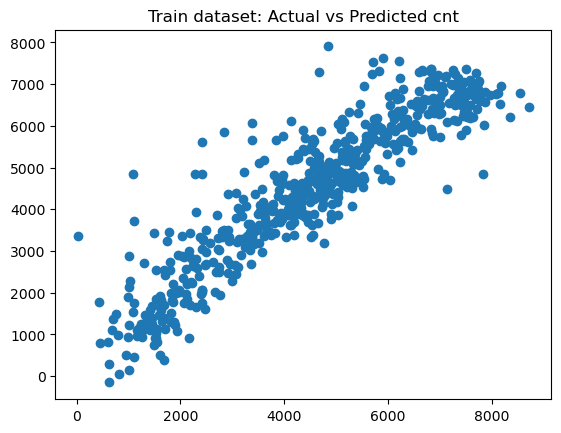

In [225]:
# Analyze by plotting actual cnt vs predicted cnt on train dataset
plt.scatter(y_train, y_train_predict)
plt.title("Train dataset: Actual vs Predicted cnt")
plt.show()

## Residual Analysis

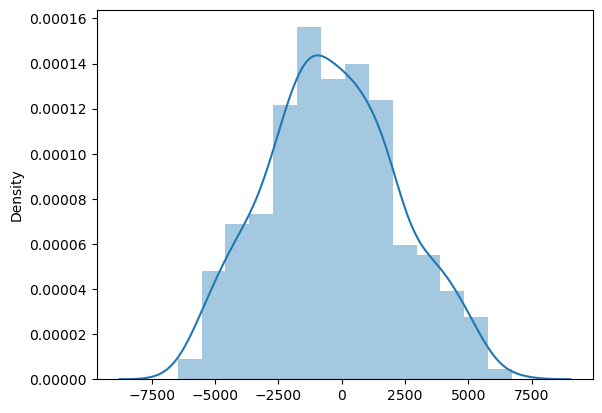

In [226]:
# Calculate residual using y_train and y_train_predict
residual = y_train-y_train_predict
plt.figure()
sns.distplot(residual)
plt.show()

##### Observations:
##### 1. Residuals are normally distributed
##### 2. Residuals have a mean of zero.

## Prediction and evaluation over test dataset

In [227]:
# Predict cnt using linear regression model over test dataset
y_test_predict=res1.predict(X_test_sm)

#### Compute R2 score for test and train dataset

In [228]:
# Import packages for R2 score computation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [229]:
# Compute R2 score for test dataset
r2=r2_score(y_true=y_test,y_pred=y_test_predict)
print(r2)

0.7617437005572532


In [230]:
# Compute R2 score for train dataset
r2=r2_score(y_true=y_train,y_pred=y_train_predict)
print(r2)

0.8307373326304269


##### Observations: As R2 score is in similar range for test data and train data, we can conclude that model is performing well over train data as well as test data.

### An alternate model with 8 significant features is analyzed. However, the model with 10 significant features gives higher adjusted_R2 value. So we select the model with 10 features.

## Linear Regression Model

### cnt = 4505.2671 + 1007.5573 * yr + 250.1054 * workingday + 900.5355 * atemp - 200.7689 * windspeed - 373.0995 * spring + 118.3874 * summer + 257.3854 * winter + 224.8540 * '6' - 405.8820 * light - 317.1809 * mist 